In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow
 

import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# optimizer
from keras.optimizers import adam_v2
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

In [2]:
forestfires=pd.read_csv("C:/Users/SANJAY/Desktop/ExcelR/Assignments/Assignment - 16/Neural Networks/forestfires.csv")
forestfires.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
forestfires.shape

(517, 31)

In [4]:
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
forestfires.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
forestfires.duplicated().value_counts()

False    509
True       8
dtype: int64

In [8]:
forestfires[forestfires.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [9]:
#Droping duplicated records from dataset
ffires_nodup=forestfires.copy()
ffires_nodup=forestfires.drop_duplicates().reset_index()
ffires_nodup=ffires_nodup.drop('index',axis=1)
ffires_nodup

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
505,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
506,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
507,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [10]:
ffires_nodup.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,509.0,90.618075,5.555527,18.7,90.2,91.60,92.90,96.20
DMC,509.0,110.235756,63.804112,1.1,62.3,108.30,141.30,291.30
DC,509.0,547.787623,248.196222,7.9,437.7,664.20,713.90,860.60
ISI,509.0,9.023576,4.585083,0.0,6.4,8.40,11.00,56.10
temp,509.0,18.865422,5.841083,2.2,15.4,19.30,22.80,33.30
RH,509.0,44.253438,16.365192,15.0,32.0,42.00,53.00,100.00
wind,509.0,4.011395,1.800926,0.4,2.7,4.00,4.90,9.40
rain,509.0,0.020432,0.296261,0.0,0.0,0.00,0.00,6.40
area,509.0,12.992908,64.133357,0.0,0.0,0.61,6.58,1090.84
dayfri,509.0,0.163065,0.369788,0.0,0.0,0.00,0.00,1.00


# Visualizing data points

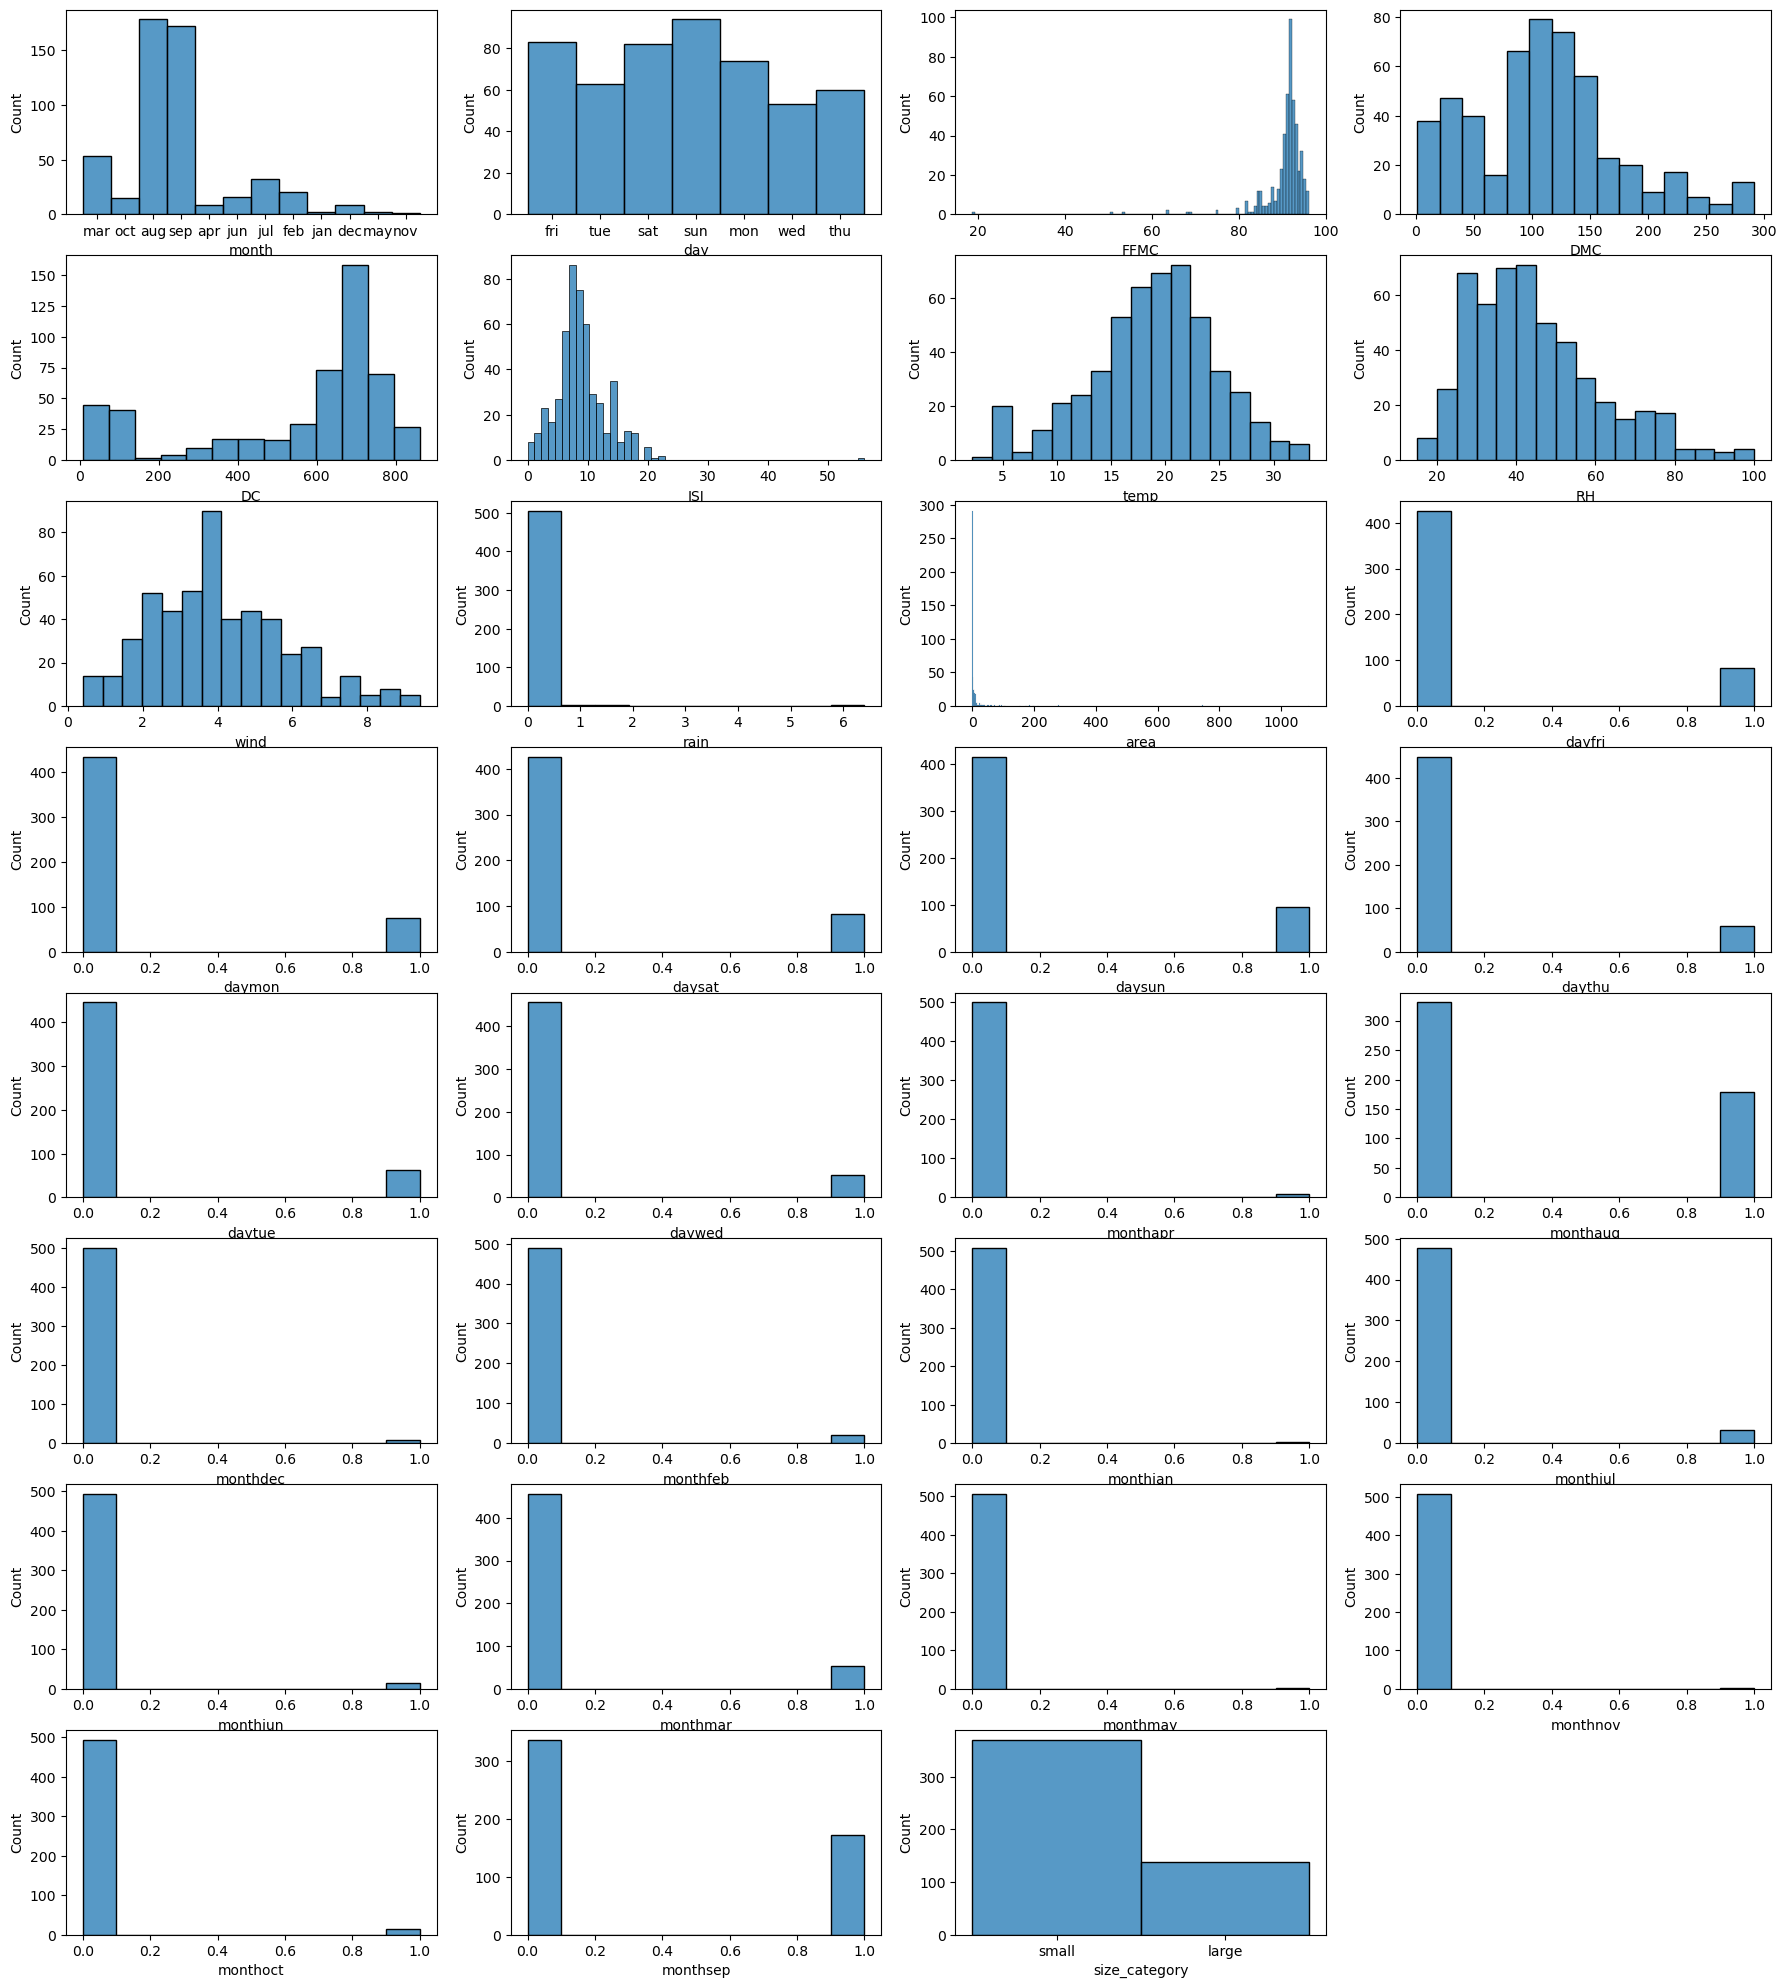

In [11]:
#plotting histplots to observe datapoints nature
plt.figure(figsize=(22,25))
for i, column in enumerate(ffires_nodup.columns, 1):
    plt.subplot(8,4,i)
    sns.histplot(ffires_nodup[column])
     

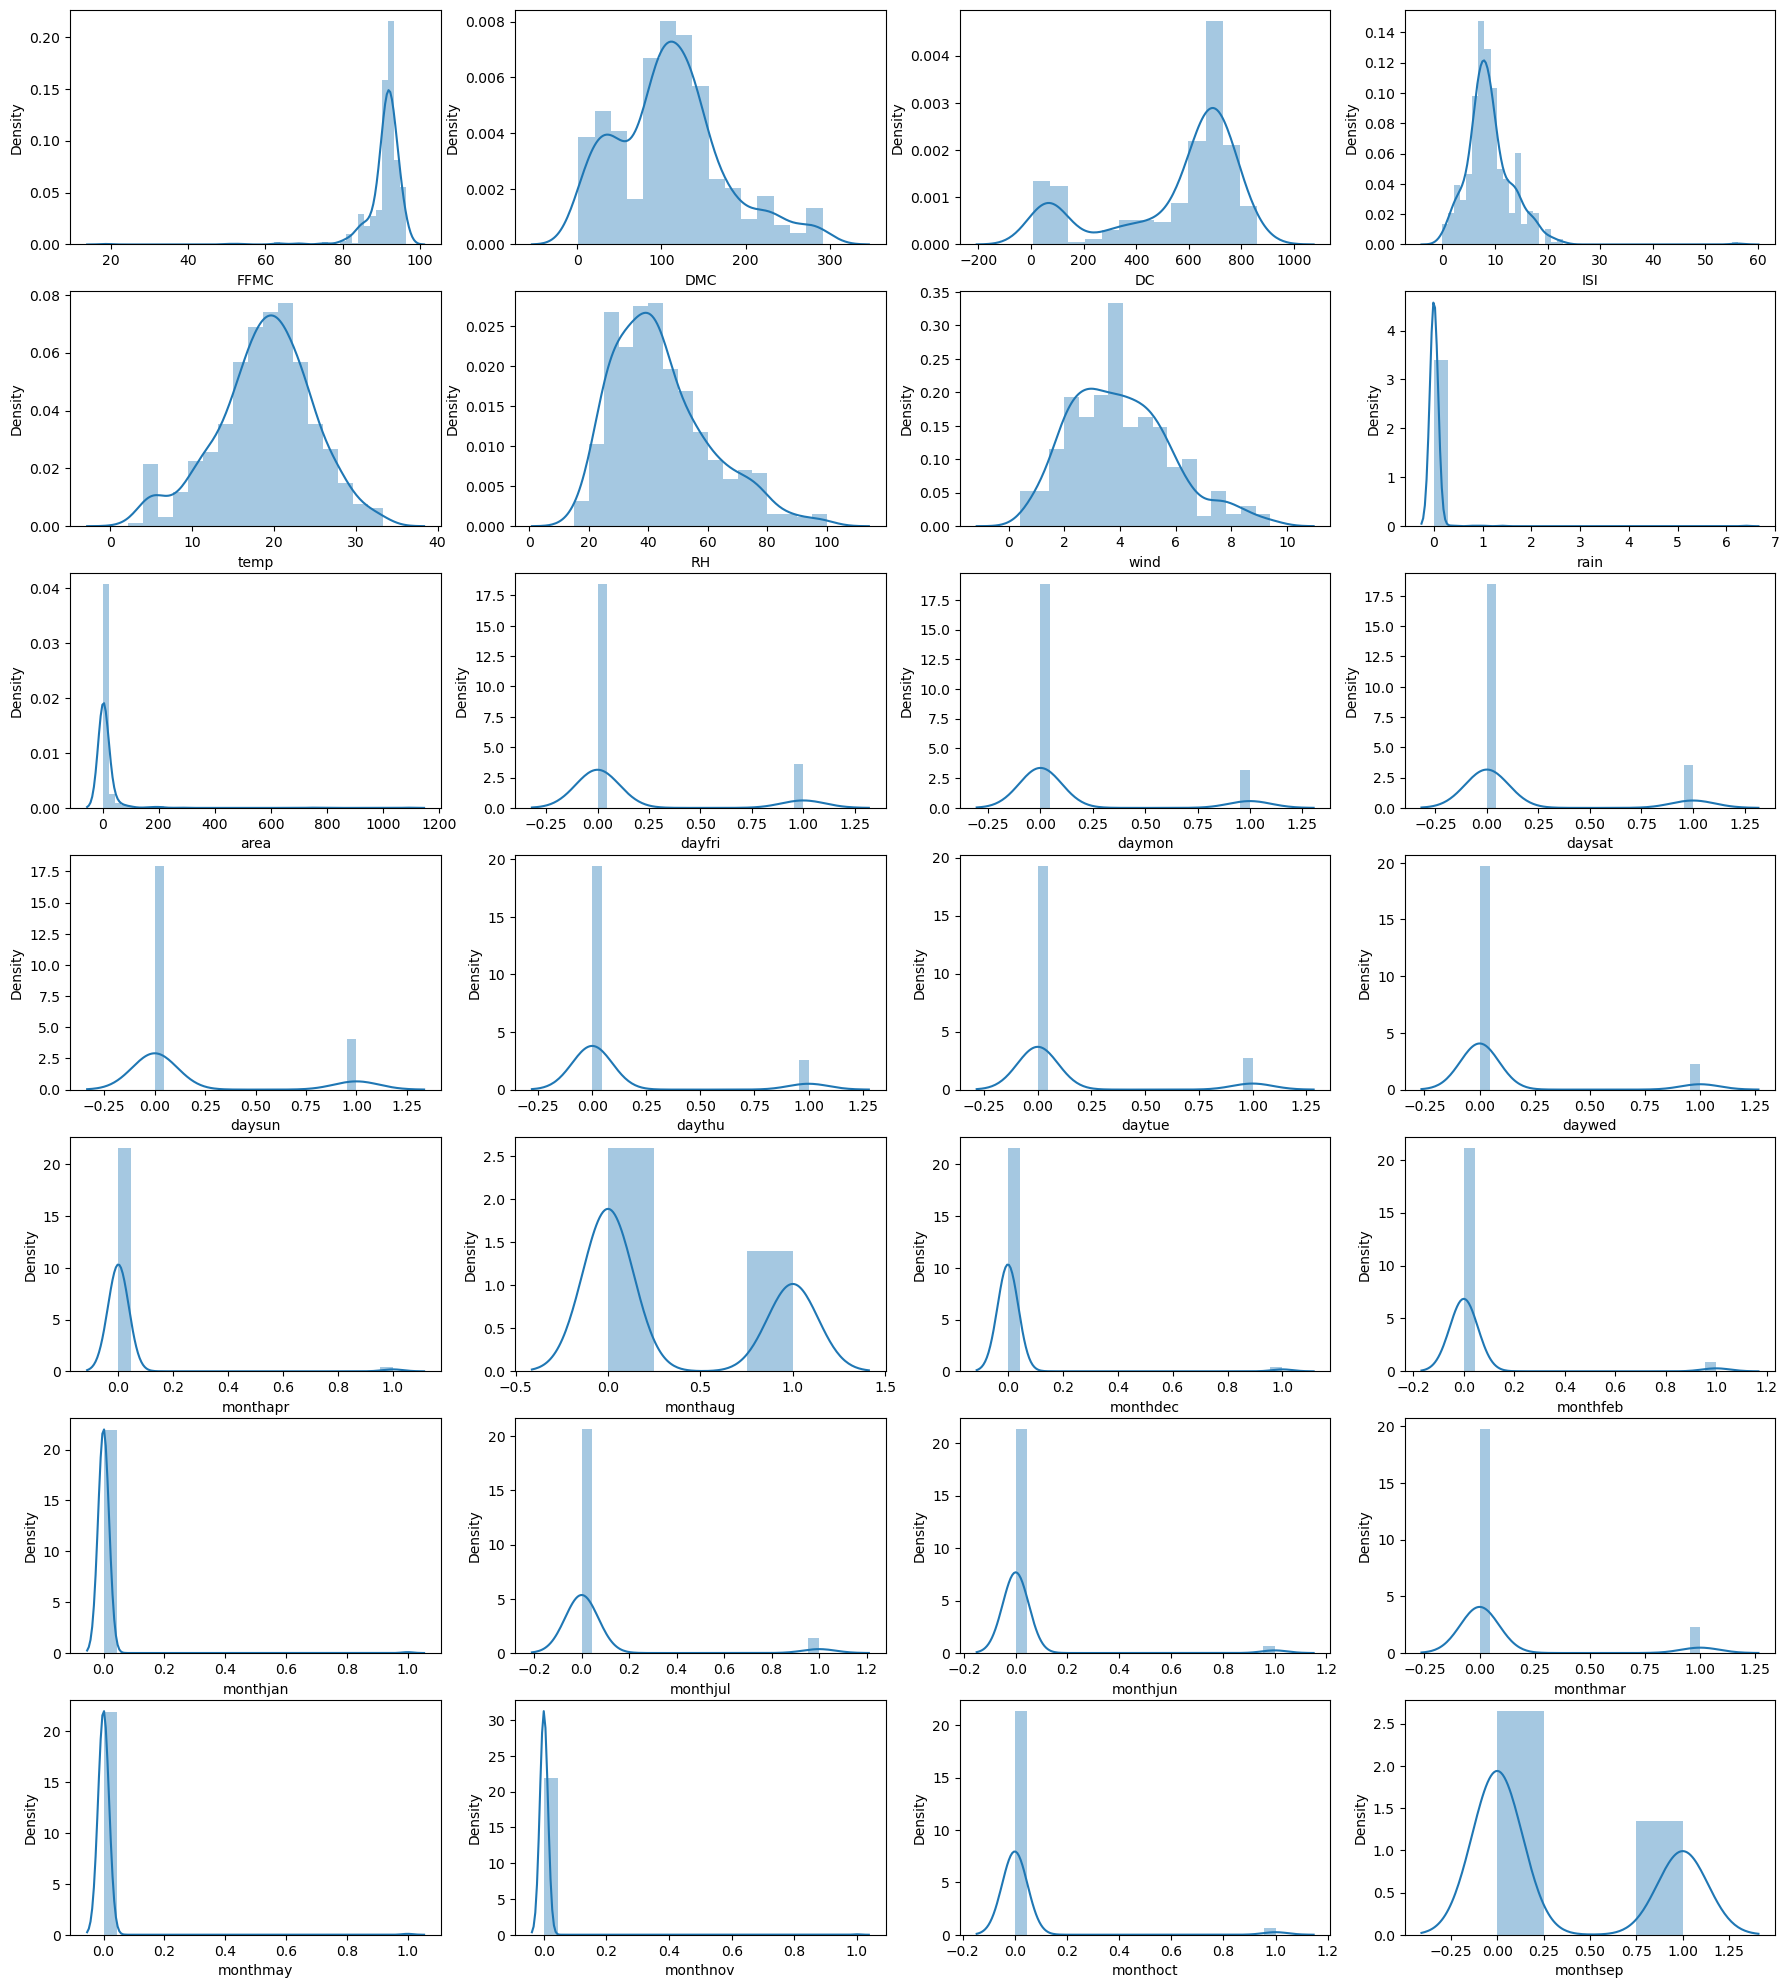

In [12]:
#plotting histplots to observe datapoints nature
plt.figure(figsize=(22,25))
for i, column in enumerate(ffires_nodup[[feature for feature in ffires_nodup.columns if ffires_nodup[feature].dtypes != 'O']].columns, 1):
    plt.subplot(7,4,i)
    sns.distplot(ffires_nodup[column])

Text(0.5, 1.0, 'Correlation')

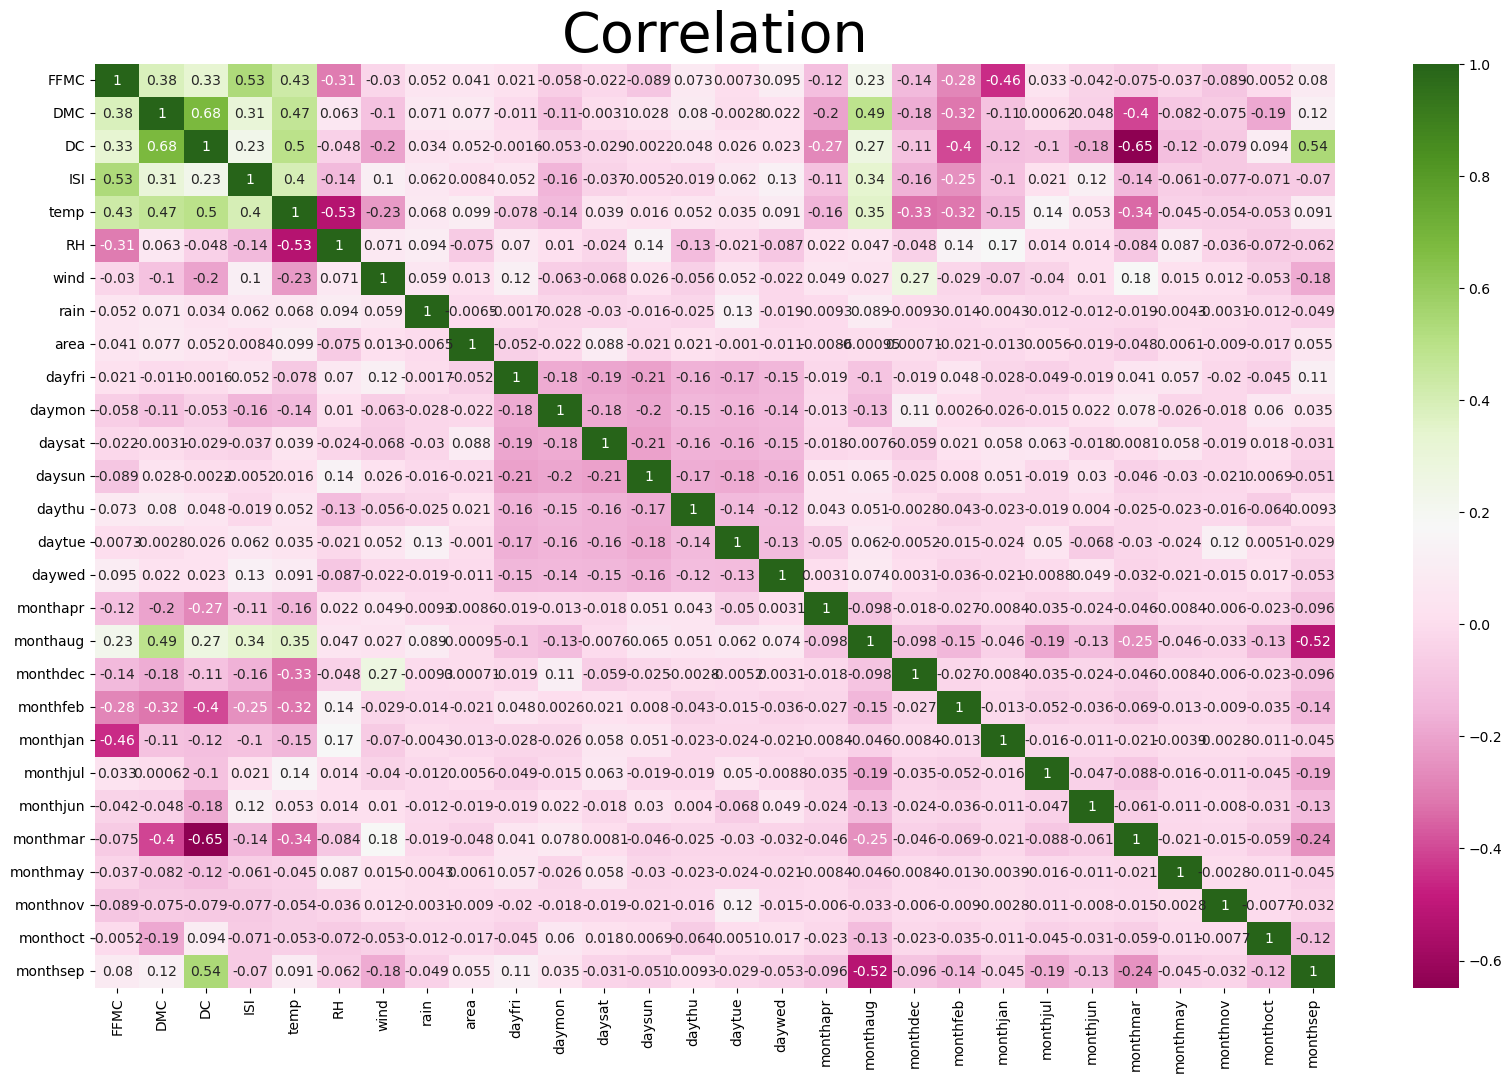

In [44]:
#plotting the heatmap for correlation
plt.figure(figsize=(20,12))
sns.heatmap(ffires_nodup.corr(), annot=True, cmap='PiYG')
plt.title("Correlation", fontsize=40)


# Label encoding

In [22]:

label_encoder=LabelEncoder()

ffires_lab=ffires_nodup.copy()

for i, column in enumerate(ffires_lab[[feature for feature in ffires_lab.columns if ffires_lab[feature].dtypes == 'O']].columns, 1):
      ffires_lab[column]=label_encoder.fit_transform(ffires_lab[column])
ffires_lab

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
505,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
506,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
507,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


# Standardising Data

In [23]:
std=StandardScaler()
ffires_std=ffires_lab.copy()
std.fit_transform(ffires_std) 

array([[ 2.71858196e-01, -1.42449474e+00, -7.96039810e-01, ...,
        -1.74253759e-01, -7.14412875e-01,  6.09891511e-01],
       [ 9.58019296e-01,  1.17804590e+00, -3.25665522e-03, ...,
         5.73875712e+00, -7.14412875e-01,  6.09891511e-01],
       [ 9.58019296e-01, -3.83478484e-01, -3.25665522e-03, ...,
         5.73875712e+00, -7.14412875e-01,  6.09891511e-01],
       ...,
       [-1.10046400e+00,  1.37029645e-01, -1.62485856e+00, ...,
        -1.74253759e-01, -7.14412875e-01, -1.63963587e+00],
       [-1.10046400e+00, -3.83478484e-01,  6.81419706e-01, ...,
        -1.74253759e-01, -7.14412875e-01,  6.09891511e-01],
       [ 7.29298930e-01,  1.17804590e+00, -2.00323234e+00, ...,
        -1.74253759e-01, -7.14412875e-01,  6.09891511e-01]])

In [24]:
ffires_std=pd.DataFrame(std.fit_transform(ffires_std),columns=ffires_lab.columns)
ffires_std

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0.271858,-1.424495,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370,-0.069035,...,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413,0.609892
1,0.958019,1.178046,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364,-0.069035,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,5.738757,-0.714413,0.609892
2,0.958019,-0.383478,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037,-0.069035,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,5.738757,-0.714413,0.609892
3,0.271858,-1.424495,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333,0.606709,...,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413,0.609892
4,0.271858,0.137030,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129,-0.069035,...,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413,0.609892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,-1.100464,0.137030,-1.624859,-0.839890,0.475141,-1.555170,1.531115,-0.749487,-0.728894,-0.069035,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413,-1.639636
505,-1.100464,0.137030,-1.624859,-0.839890,0.475141,-1.555170,0.520034,1.635965,0.994136,-0.069035,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413,-1.639636
506,-1.100464,0.137030,-1.624859,-0.839890,0.475141,-1.555170,0.400076,1.574799,1.494370,-0.069035,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413,-1.639636
507,-1.100464,-0.383478,0.681420,0.561083,0.269860,0.496973,1.154102,-0.137832,-0.006333,-0.069035,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413,0.609892


# Data Splitting

In [25]:
x=ffires_std.drop('size_category',axis=1)
y=ffires_std['size_category']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train.shape, x_test.shape,y_train.shape, y_test.shape

((341, 30), (168, 30), (341,), (168,))

# Tuning of Hyperparameters : Batch Size and Epochs

In [27]:
#model def creation
def create_model():
    model = Sequential(name='Hypterparameter-Tuning-Dummy')
    model.add(Dense(12, input_dim=30, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [28]:
#model
model=KerasClassifier(build_fn=create_model,verbose=0)
#hyper param 
batch_size=[10,20]
epochs=[10,20,50]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START batch_size=10, epochs=10....................................
[CV 1/5; 1/6] END .....batch_size=10, epochs=10;, score=0.990 total time=   1.3s
[CV 2/5; 1/6] START batch_size=10, epochs=10....................................
[CV 2/5; 1/6] END .....batch_size=10, epochs=10;, score=0.853 total time=   0.8s
[CV 3/5; 1/6] START batch_size=10, epochs=10....................................
[CV 3/5; 1/6] END .....batch_size=10, epochs=10;, score=0.833 total time=   0.8s
[CV 4/5; 1/6] START batch_size=10, epochs=10....................................
[CV 4/5; 1/6] END .....batch_size=10, epochs=10;, score=0.853 total time=   0.8s
[CV 5/5; 1/6] START batch_size=10, epochs=10....................................
[CV 5/5; 1/6] END .....batch_size=10, epochs=10;, score=0.911 total time=   1.0s
[CV 1/5; 2/6] START batch_size=10, epochs=20....................................
[CV 1/5; 2/6] END .....batch_size=10, epochs=20;,

In [29]:
#summarizing results
print('Best:{},using{}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print('{},{} with:{}'.format(mean,stdev,param))

Best:0.9252960562705994,using{'batch_size': 20, 'epochs': 50}
0.8880605578422547,0.05729696169315434 with:{'batch_size': 10, 'epochs': 10}
0.90172780752182,0.05306567794627962 with:{'batch_size': 10, 'epochs': 20}
0.919413709640503,0.04321834767294576 with:{'batch_size': 10, 'epochs': 50}
0.8369831085205078,0.09222926001890892 with:{'batch_size': 20, 'epochs': 10}
0.8821393847465515,0.06289682249953633 with:{'batch_size': 20, 'epochs': 20}
0.9252960562705994,0.039626059924372764 with:{'batch_size': 20, 'epochs': 50}


# Tuning of Hyperparameters:- Learning rate and Drop out rate

In [30]:
#model def
def create_model(learning_rate,dropout_rate):
    model=Sequential()
    model.add(Dense(8,input_dim=30,kernel_initializer='normal',activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(12,input_dim=8,kernel_initializer='normal',activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation='sigmoid'))

    adam=Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
    return model

#model creation
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=40,epochs=50)
#grid search params
learning_rate=[0.001,0.01,0.1]
dropout_rate=[0.0,0.1,0.2]
#grid search dictionary
param_grids=dict(learning_rate=learning_rate,dropout_rate=dropout_rate)

#gridsearch cv fit
grid=GridSearchCV(estimator=model,param_grid=param_grids,cv=KFold(),verbose=10)
grid_result=grid.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.951 total time=   1.0s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.765 total time=   0.9s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.686 total time=   0.9s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.735 total time=   1.1s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.752 total time=   1.3s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=1.000 total time=   1.0s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................
[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.833 total time=   1.0s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................
[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.676 total time=   1.2s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................
[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.765 total time=   1.1s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................
[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.871 total time=   1.1s


In [31]:
# summarizing results
print('Best:{},using{}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print('{},{} with:{}'.format(mean,stdev,param))

Best:0.9194525241851806,using{'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7779460310935974,0.09054037041188902 with:{'dropout_rate': 0.0, 'learning_rate': 0.001}
0.899747622013092,0.04753315862316933 with:{'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9017084002494812,0.046148357674850135 with:{'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7661424994468689,0.12091601083183004 with:{'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9155309677124024,0.044521026027957 with:{'dropout_rate': 0.1, 'learning_rate': 0.01}
0.899767029285431,0.05136338800076337 with:{'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7425742745399475,0.15627793672201637 with:{'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9194525241851806,0.04697160495339589 with:{'dropout_rate': 0.2, 'learning_rate': 0.01}
0.8291593790054321,0.10811734965109143 with:{'dropout_rate': 0.2, 'learning_rate': 0.1}


# Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [32]:
#model def
def create_model(activation_function,init):
    model=Sequential()
    model.add(Dense(8,input_dim=30,kernel_initializer=init,activation=activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(12,input_dim=8,kernel_initializer=init,activation=activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))

    adam=Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
    return model

#model creation
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=40,epochs=50)
#grid search params
activation_function=['softmax','relu','tanh','linear']
init=['uniform','normal','zero']
#grid search dictionary
param_grids=dict(activation_function=activation_function,init=init)

#gridsearch cv fit
grid=GridSearchCV(estimator=model,param_grid=param_grids,cv=KFold(),verbose=10)
grid_result=grid.fit(x,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   1.7s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.765 total time=   1.2s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.510 total time=   1.3s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.676 total time=   2.1s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.693 total time=   2.1s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.814 total time=   1.1s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................
[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.843 total time=   1.0s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.871 total time=   1.0s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=0.990 total time=   1.1s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.765 total time=   1.5s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.765 total time=   1.6s
[CV 4/5; 11/12] START activation_f

In [33]:
# Summarizing results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
     print('{},{} with: {}'.format(mean, stdev, param))
     

Best : 0.8624538898468017, using {'activation_function': 'tanh', 'init': 'uniform'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'softmax', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'softmax', 'init': 'zero'}
0.8093962430953979,0.09997114856936676 with: {'activation_function': 'relu', 'init': 'uniform'}
0.7602601528167725,0.11183754750311058 with: {'activation_function': 'relu', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'relu', 'init': 'zero'}
0.8624538898468017,0.06936779535388994 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.8349640727043152,0.08282891638433379 with: {'activation_function': 'tanh', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'tanh', 'init': 'zero'}
0.8566103577613831,0.07553490806716026 with: {'activation_functio

# Tuning of Hyperparameter :-Number of Neurons in activation layer

In [34]:
#model def
def create_model(neuron1,neuron2):
    model=Sequential()
    model.add(Dense(neuron1,input_dim=30,kernel_initializer='uniform',activation='linear'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim=neuron1,kernel_initializer='uniform',activation='linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))

    adam=Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
    return model

#model creation
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=40,epochs=50)
#grid search params
neuron1=[4,8,16]
neuron2=[2,4,8]
#grid search dictionary
param_grids=dict(neuron1=neuron1,neuron2=neuron2)

#gridsearch cv fit
grid=GridSearchCV(estimator=model,param_grid=param_grids,cv=KFold(),verbose=10)
grid_result=grid.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.951 total time=   1.7s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.765 total time=   1.0s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.667 total time=   1.0s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.716 total time=   1.2s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.752 total time=   2.1s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [35]:
# Summarizing the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8762376189231873, using {'neuron1': 16, 'neuron2': 8}
0.7701028943061828,0.09666099472924441 with: {'neuron1': 4, 'neuron2': 2}
0.8015142679214478,0.0952663362899527 with: {'neuron1': 4, 'neuron2': 4}
0.8152203440666199,0.08783310640745563 with: {'neuron1': 4, 'neuron2': 8}
0.8014948487281799,0.09491603891062401 with: {'neuron1': 8, 'neuron2': 2}
0.8211803555488586,0.08741933102548809 with: {'neuron1': 8, 'neuron2': 4}
0.8565327048301696,0.07363136474609881 with: {'neuron1': 8, 'neuron2': 8}
0.8408658385276795,0.07876846976381753 with: {'neuron1': 16, 'neuron2': 2}
0.8546107411384583,0.07400200559338126 with: {'neuron1': 16, 'neuron2': 4}
0.8762376189231873,0.06664773410989594 with: {'neuron1': 16, 'neuron2': 8}


# Training model with optimum values of Hyperparameters

In [36]:
# Python program to define a function to compute accuracy score of model's predicted class  
  
# Defining a function which takes true values of the sample and values predicted by the model  
def compute_accuracy(Y_true, Y_pred):  
    correctly_predicted = 0  
    # iterating over every label and checking it with the true sample  
    for true_label, predicted in zip(Y_true, Y_pred):  
        if true_label == predicted:  
            correctly_predicted += 1  
    # computing the accuracy score  
    accuracy_score = correctly_predicted / len(Y_true)  
    return accuracy_score  

In [37]:
from sklearn.metrics import classification_report, accuracy_score
#model def
def create_model():
    model=Sequential()
    model.add(Dense(16,input_dim=30,kernel_initializer='uniform',activation='linear'))
    model.add(Dropout(0.2))
    model.add(Dense(4,input_dim=16,kernel_initializer='uniform',activation='linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))

    adam=Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
    return model

#model creation
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=20,epochs=50)
#model fit
model.fit(x,y)
#prediction on train 
y_pred=model.predict(x)
#printing mertics
compute_accuracy(y,y_pred)

16/16 [==============================] - 0s 2ms/step


0.9783889980353635

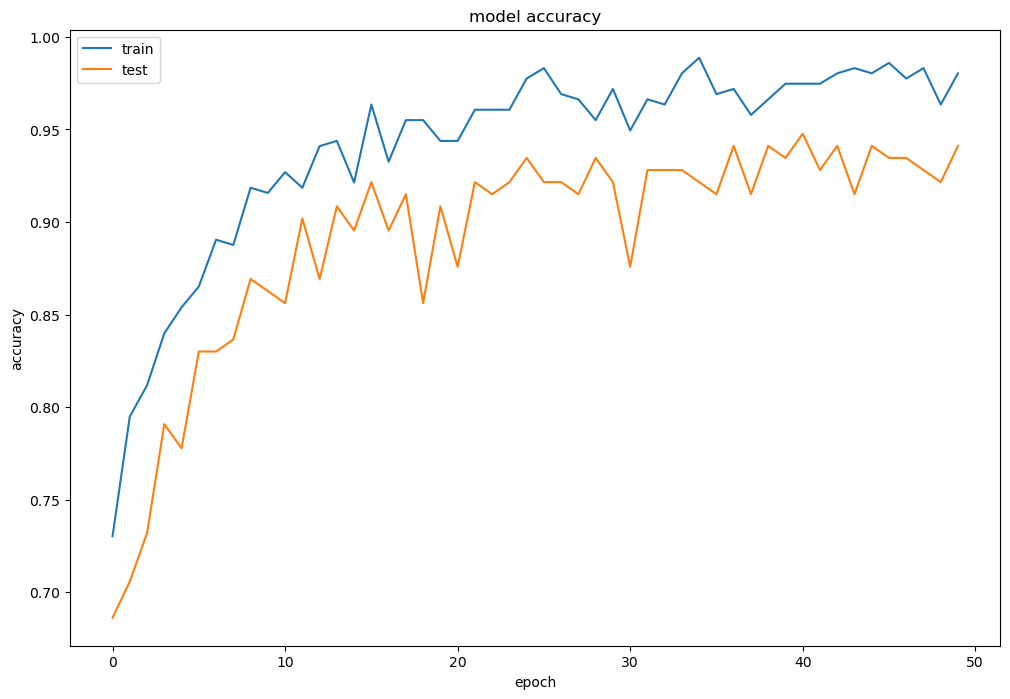

In [38]:

#final plot with accuracy of train and test
history = model.fit(x,y,validation_split = 0.3, epochs=50, batch_size=20)
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
     

In [40]:
model=Sequential()
model.add(Dense(15,input_dim=30,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["mean_squared_error"])

In [41]:
history=model.fit(x,y,validation_split=0.33,epochs=250,batch_size=10)
scores=model.evaluate(x,y)
print("%s: %.2f%%"%(model.metrics_names[1],scores[1]*100))
history.history.keys()

Epoch 1/250
35/35 [==============================] - 0s 5ms/step - loss: 0.6737 - mean_squared_error: 1.1107 - val_loss: 0.7023 - val_mean_squared_error: 1.5031
Epoch 2/250
35/35 [==============================] - 0s 3ms/step - loss: 0.5131 - mean_squared_error: 1.0388 - val_loss: 0.5523 - val_mean_squared_error: 1.4371
Epoch 3/250
35/35 [==============================] - 0s 4ms/step - loss: 0.3867 - mean_squared_error: 0.9892 - val_loss: 0.4376 - val_mean_squared_error: 1.3887
Epoch 4/250
35/35 [==============================] - 0s 3ms/step - loss: 0.2780 - mean_squared_error: 0.9550 - val_loss: 0.3472 - val_mean_squared_error: 1.3536
Epoch 5/250
35/35 [==============================] - 0s 3ms/step - loss: 0.1908 - mean_squared_error: 0.9334 - val_loss: 0.2541 - val_mean_squared_error: 1.3212
Epoch 6/250
35/35 [==============================] - 0s 3ms/step - loss: 0.1024 - mean_squared_error: 0.9180 - val_loss: 0.1815 - val_mean_squared_error: 1.2973
Epoch 7/250
35/35 [===============

Epoch 101/250
35/35 [==============================] - 0s 3ms/step - loss: -24.8441 - mean_squared_error: 0.8655 - val_loss: -13.3602 - val_mean_squared_error: 1.1473
Epoch 102/250
35/35 [==============================] - 0s 3ms/step - loss: -25.3145 - mean_squared_error: 0.8642 - val_loss: -13.6306 - val_mean_squared_error: 1.1484
Epoch 103/250
35/35 [==============================] - 0s 3ms/step - loss: -25.8147 - mean_squared_error: 0.8632 - val_loss: -13.7783 - val_mean_squared_error: 1.1470
Epoch 104/250
35/35 [==============================] - 0s 3ms/step - loss: -26.2611 - mean_squared_error: 0.8604 - val_loss: -14.0472 - val_mean_squared_error: 1.1458
Epoch 105/250
35/35 [==============================] - 0s 3ms/step - loss: -26.7212 - mean_squared_error: 0.8639 - val_loss: -14.3616 - val_mean_squared_error: 1.1456
Epoch 106/250
35/35 [==============================] - 0s 4ms/step - loss: -27.2672 - mean_squared_error: 0.8609 - val_loss: -14.6854 - val_mean_squared_error: 1.145

35/35 [==============================] - 0s 3ms/step - loss: -53.8895 - mean_squared_error: 0.8664 - val_loss: -29.3342 - val_mean_squared_error: 1.1411
Epoch 151/250
35/35 [==============================] - 0s 3ms/step - loss: -54.5325 - mean_squared_error: 0.8671 - val_loss: -29.6454 - val_mean_squared_error: 1.1405
Epoch 152/250
35/35 [==============================] - 0s 2ms/step - loss: -55.2069 - mean_squared_error: 0.8648 - val_loss: -30.0206 - val_mean_squared_error: 1.1421
Epoch 153/250
35/35 [==============================] - 0s 3ms/step - loss: -55.9087 - mean_squared_error: 0.8686 - val_loss: -30.3515 - val_mean_squared_error: 1.1413
Epoch 154/250
35/35 [==============================] - 0s 3ms/step - loss: -56.5688 - mean_squared_error: 0.8734 - val_loss: -30.8879 - val_mean_squared_error: 1.1480
Epoch 155/250
35/35 [==============================] - 0s 3ms/step - loss: -57.2667 - mean_squared_error: 0.8704 - val_loss: -31.2721 - val_mean_squared_error: 1.1440
Epoch 156/25

Epoch 248/250
35/35 [==============================] - 0s 5ms/step - loss: -141.5103 - mean_squared_error: 0.8788 - val_loss: -76.3076 - val_mean_squared_error: 1.1629
Epoch 249/250
35/35 [==============================] - 0s 2ms/step - loss: -142.6307 - mean_squared_error: 0.8770 - val_loss: -76.9092 - val_mean_squared_error: 1.1616
Epoch 250/250
16/16 [==============================] - 0s 2ms/step - loss: -122.2856 - mean_squared_error: 0.9759
mean_squared_error: 97.59%


dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

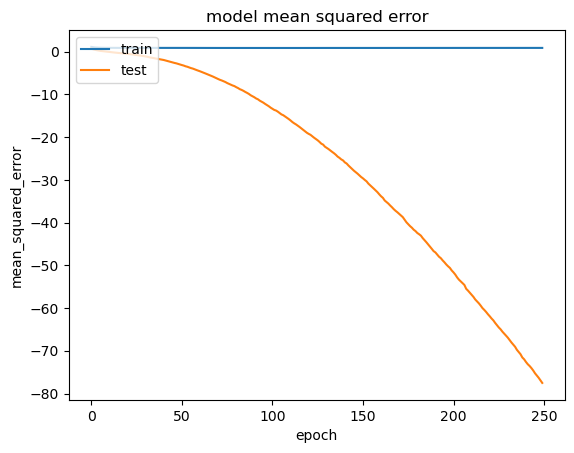

In [42]:

plt.plot(history.history["mean_squared_error"])
plt.plot(history.history["val_loss"])
plt.title("model mean squared error")
plt.ylabel("mean_squared_error")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()